In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE

In [2]:
file_path = r'E:\datasets\Customer Churn.csv'

df= pd.read_csv(file_path)

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'EstimatedSalary'], axis=1, inplace=True)

In [7]:
object_columns = df.select_dtypes(include=['object']).columns

In [8]:
print(object_columns)

Index(['Geography', 'Gender'], dtype='object')


In [9]:
le = LabelEncoder()

for col in object_columns:
    df[col] = le.fit_transform(df[col])

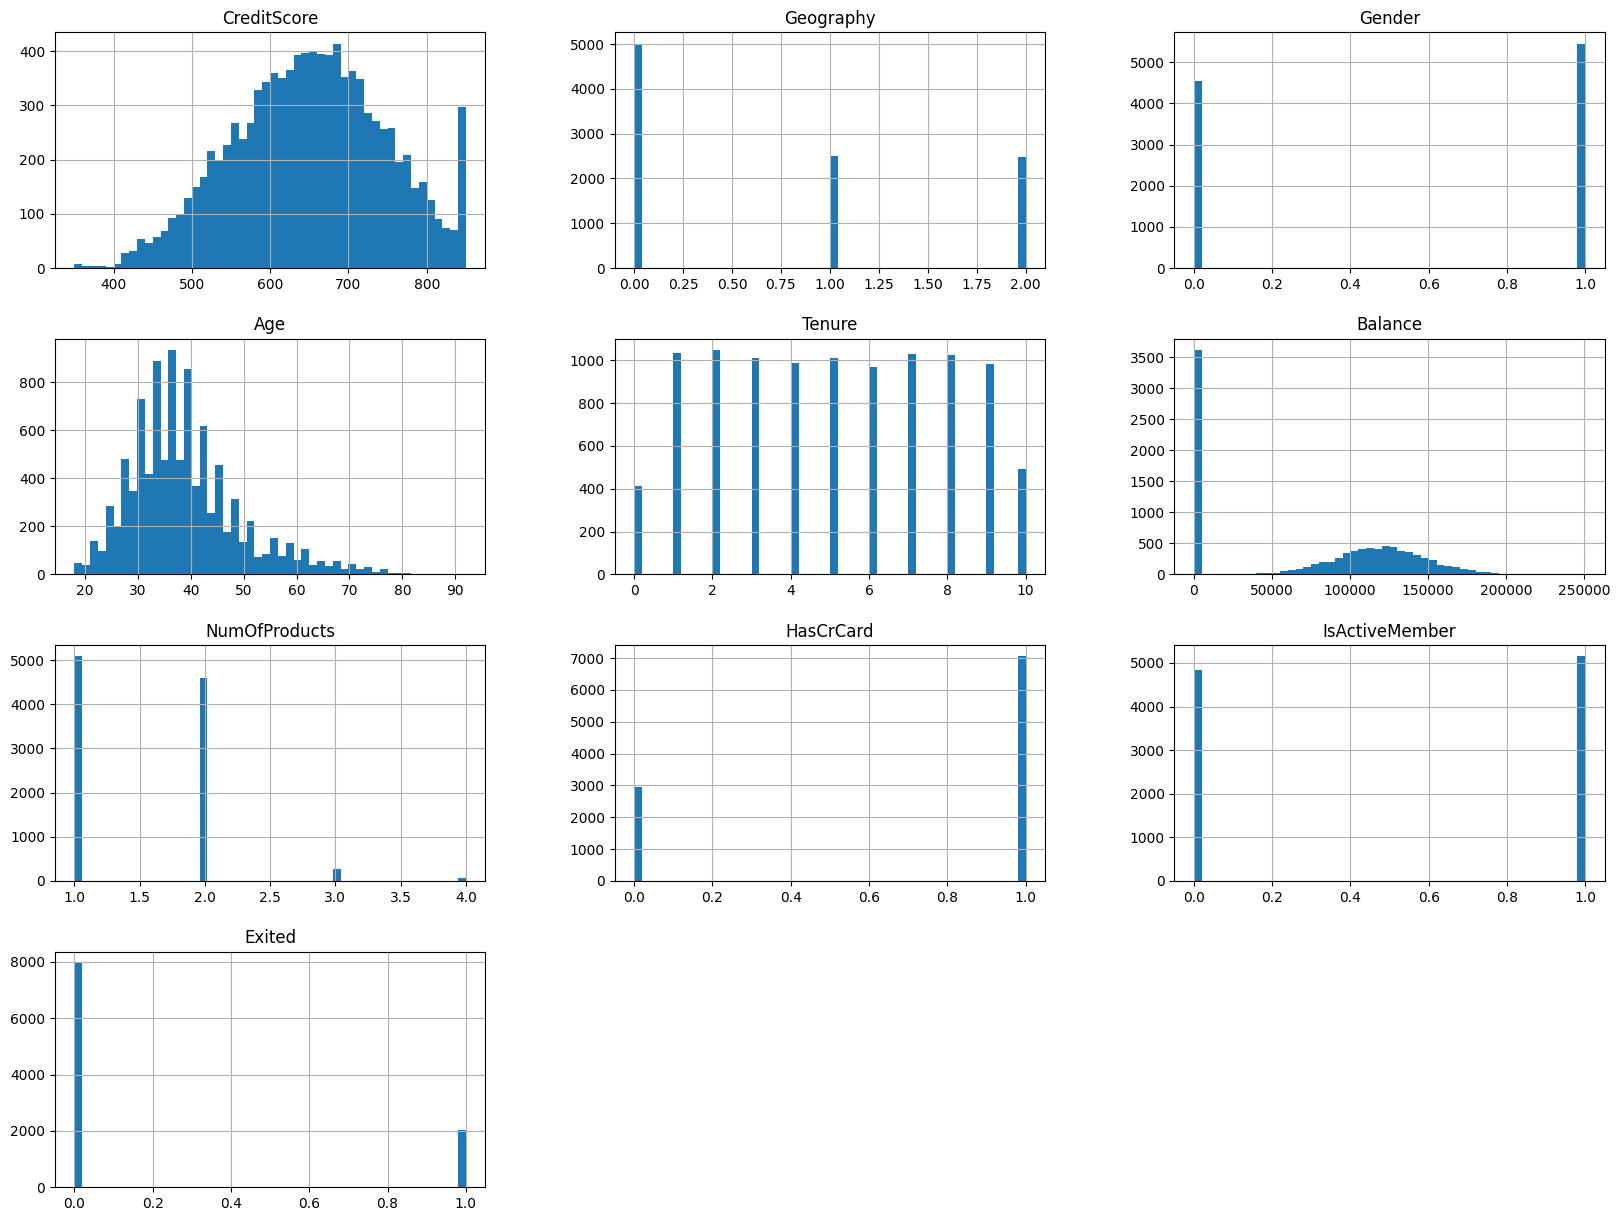

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
def plot_pie(feature):
    fig, ax = plt.subplots()
    ax.pie(df[feature].value_counts(), labels=df[feature].unique(), autopct='%1.1f%%')
    plt.show()

In [12]:
count = {}

for i in df.columns:
    count[i]=df[i].nunique()

In [13]:
count

{'CreditScore': 460,
 'Geography': 3,
 'Gender': 2,
 'Age': 70,
 'Tenure': 11,
 'Balance': 6382,
 'NumOfProducts': 4,
 'HasCrCard': 2,
 'IsActiveMember': 2,
 'Exited': 2}

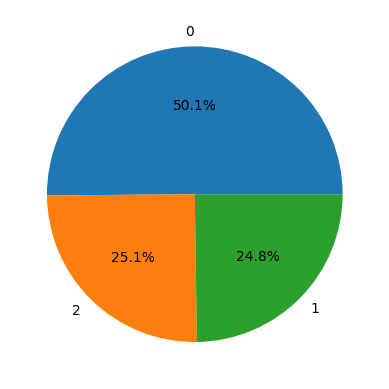

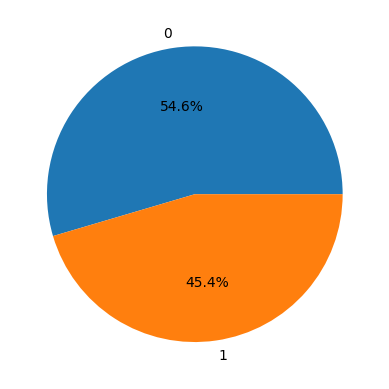

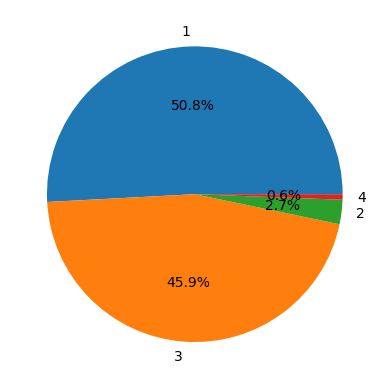

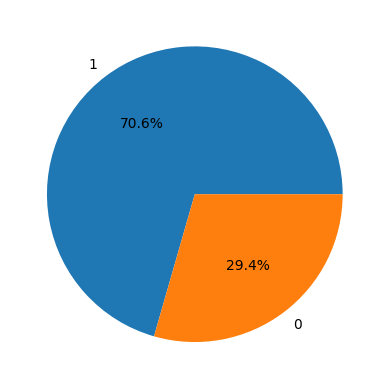

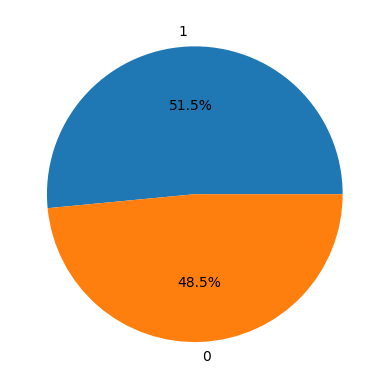

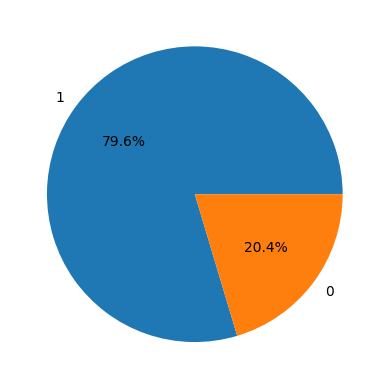

In [14]:
for i in count:
    if count[i] <= 10:
        plot_pie(i)

In [15]:
def plot_heatmap(df):

    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix Heatmap', fontsize=15)
    plt.show()

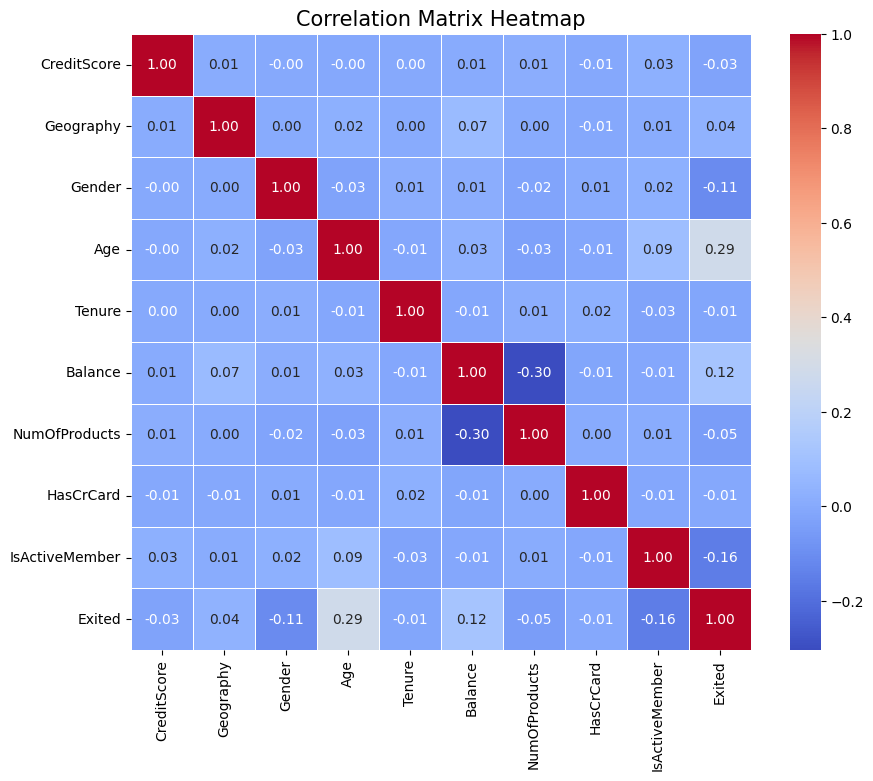

In [16]:
plot_heatmap(df)

In [17]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,0,0,42,2,0.00,1,1,1,1
1,608,2,0,41,1,83807.86,1,0,1,0
2,502,0,0,42,8,159660.80,3,1,0,1
3,699,0,0,39,1,0.00,2,0,0,0
4,850,2,0,43,2,125510.82,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,0
9996,516,0,1,35,10,57369.61,1,1,1,0
9997,709,0,0,36,7,0.00,1,0,1,1
9998,772,1,1,42,3,75075.31,2,1,0,1


In [18]:
# Split the data into features and labels
X = df.drop(['Exited'], axis=1)
y = df['Exited']

# Convert the target variable to categorical
y = to_categorical(y)

In [19]:
# Oversample the minority class using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [20]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,0,0,42,2,0.00,1,1,1
1,608,2,0,41,1,83807.86,1,0,1
2,502,0,0,42,8,159660.80,3,1,0
3,699,0,0,39,1,0.00,2,0,0
4,850,2,0,43,2,125510.82,1,1,1
...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0
9996,516,0,1,35,10,57369.61,1,1,1
9997,709,0,0,36,7,0.00,1,0,1
9998,772,1,1,42,3,75075.31,2,1,0


In [21]:
X_resampled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,0,0,42,2,0.000000,1,1,1
1,608,2,0,41,1,83807.860000,1,0,1
2,502,0,0,42,8,159660.800000,3,1,0
3,699,0,0,39,1,0.000000,2,0,0
4,850,2,0,43,2,125510.820000,1,1,1
...,...,...,...,...,...,...,...,...,...
15921,764,1,0,32,0,108466.425134,2,1,0
15922,450,1,1,56,6,127197.567334,1,1,0
15923,626,1,0,38,1,103622.594922,1,0,0
15924,696,2,0,53,1,0.000000,3,1,0


In [22]:
# separate into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# separate training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
# Scale the features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [24]:
# create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [25]:
rf.fit(X_train, y_train)

c:\Users\atiya\AppData\Local\anaconda3\envs\gpusupport\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [26]:
# Get the model score in train, test, and validation sets
train_score = rf.score(X_train, y_train)
val_score = rf.score(X_val, y_val)
test_score = rf.score(X_test, y_test)

In [27]:
print("Train Score:", train_score)
print("Validation Score:", val_score)
print("Test Score:", test_score)

Train Score: 1.0
Validation Score: 0.8453689167974883
Test Score: 0.8502824858757062


In [28]:
# Print the classification report and confusion matrix for the test set
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1633
           1       0.84      0.86      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186

Confusion Matrix:
[[1381  252]
 [ 225 1328]]


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Predict the labels of the test set
y_pred = rf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate the precision, recall, and F1-score of the model
precision = cm[0, 0] / (cm[0, 0] + cm[0, 1])
recall = cm[0, 0] / (cm[0, 0] + cm[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[1381  252]
 [ 225 1328]]
Accuracy: 0.8502824858757062
Precision: 0.8456827924066136
Recall: 0.8599003735990037
F1-score: 0.8527323247916023
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1633
           1       0.84      0.86      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



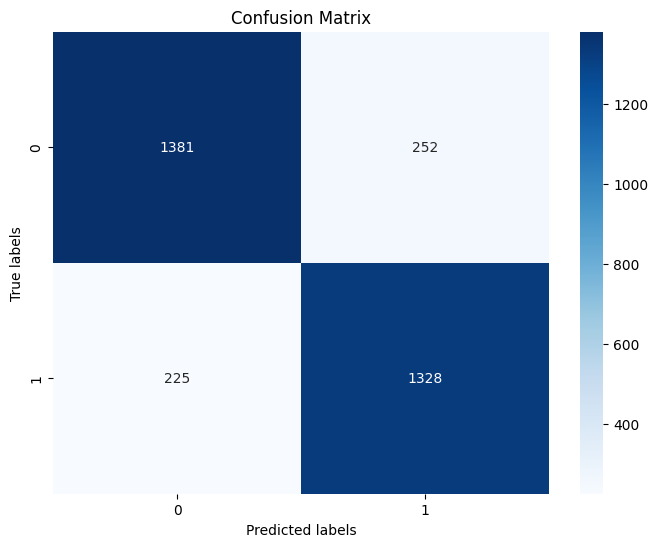

In [30]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

In [31]:
# Create a more complex neural network model
model = Sequential()
model.add(Dense(64, input_dim=9, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_2 (Batc  (None, 256)              1

In [33]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
319/319 [==============================] - 4s 8ms/step - loss: 0.0000e+00 - accuracy: 0.7742 - val_loss: 0.0000e+00 - val_accuracy: 0.8030
Epoch 2/10
319/319 [==============================] - 2s 8ms/step - loss: 0.0000e+00 - accuracy: 0.8025 - val_loss: 0.0000e+00 - val_accuracy: 0.8014
Epoch 3/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0000e+00 - accuracy: 0.7986 - val_loss: 0.0000e+00 - val_accuracy: 0.7998
Epoch 4/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0000e+00 - accuracy: 0.7900 - val_loss: 0.0000e+00 - val_accuracy: 0.7814
Epoch 5/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0000e+00 - accuracy: 0.7831 - val_loss: 0.0000e+00 - val_accuracy: 0.7865
Epoch 6/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0000e+00 - accuracy: 0.7789 - val_loss: 0.0000e+00 - val_accuracy: 0.7802
Epoch 7/10
319/319 [==============================] - 3s 9ms/step - loss: 0.0000e+00 - accuracy: 0.7

In [34]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

100/100 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7910
Test Loss: 0.0
Test Accuracy: 0.790960431098938


In [35]:
# Print the classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))
print("Confusion Matrix:")
print(confusion_matrix(y_test_class, y_pred_class))

100/100 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3186

    accuracy                           1.00      3186
   macro avg       1.00      1.00      1.00      3186
weighted avg       1.00      1.00      1.00      3186

Confusion Matrix:
[[3186]]


c:\Users\atiya\AppData\Local\anaconda3\envs\gpusupport\lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
